# First notebook - Data housing

### imports

In [88]:
import dect_function
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import tables
import pandas as pd


### Part 1
### Boot Algorithms Detection of anomalies and 
### Running the algorithms


In [89]:
algos = [LocalOutlierFactor(n_neighbors=20, algorithm="auto", leaf_size=30, metric="minkowski", p=2, metric_params=None, contamination="auto", novelty=False, n_jobs=None),
    EllipticEnvelope( store_precision=True, assume_centered=False, support_fraction=None, contamination=0.02, random_state=None),
    OneClassSVM(kernel="rbf", degree=3, gamma="scale", coef0=0, tol=0.001, nu=0.001, shrinking=True, cache_size=200, verbose=False, max_iter=-1),
    IsolationForest(n_estimators=100, max_samples="auto", contamination=0.1, max_features=2, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)]

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
url = "../data_sets/housing.csv"

df = pd.read_csv(url)
acc = dect_function.improvement_test_regression(df,algos)
for ac in acc:
    print(ac)

{'mean_squared_error': 24.144548895007606, 'mean_absolute_error': 3.656168318002462}
{'mean_squared_error': 23.382530603640703, 'mean_absolute_error': 3.589724440612474}
{'mean_squared_error': 24.086887925507305, 'mean_absolute_error': 3.662938963036632}
{'mean_squared_error': 24.208864968679066, 'mean_absolute_error': 3.664276154456198}
{'mean_squared_error': 22.912121330282254, 'mean_absolute_error': 3.4937493138166733}


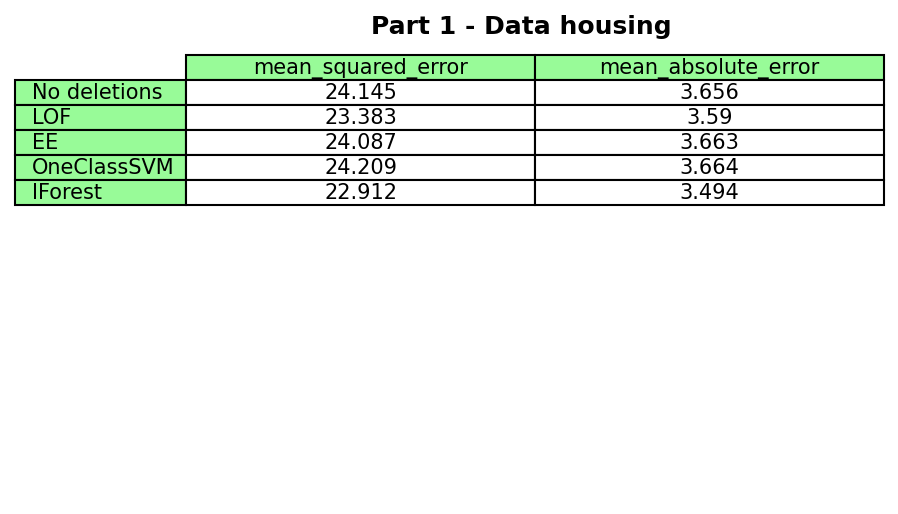

In [90]:
tables.algo_alone(acc ,"Part 1 - Data housing")

### Part 2
### 4 experiments of combinations

In [91]:
acc2 = dect_function.delete_all(df,[algos[0],algos[1],algos[3]])
# acc2 = dect_function.delete_all(df,[algos[0],algos[1],algos[3],algos[2]])
print(acc2)
#[algos[0],algos[1],algos[3],algos[2]]

{'mean_squared_error': 23.408445021817737, 'mean_absolute_error': 3.4494350604890904}


In [92]:
acc3 = dect_function.Add_and_delete(df,[algos[0],algos[1],algos[3]])
print(acc3)

{'mean_squared_error': 23.917988401162727, 'mean_absolute_error': 3.6529575759088}


In [93]:

acc4 = dect_function.uniformy_average(df,[algos[1],algos[3]])
print(acc4)

{'mean_squared_error': 24.333513249593867, 'mean_absolute_error': 3.6737982918878562}


In [94]:

algos2 = [algos[1],algos[3]]
ratio = [0.3,0.7]

acc5 = dect_function.ratio_average(df,algos2,ratio,10)
print(acc5)

{'mean_squared_error': 24.92405679610853, 'mean_absolute_error': 3.724333775011837}


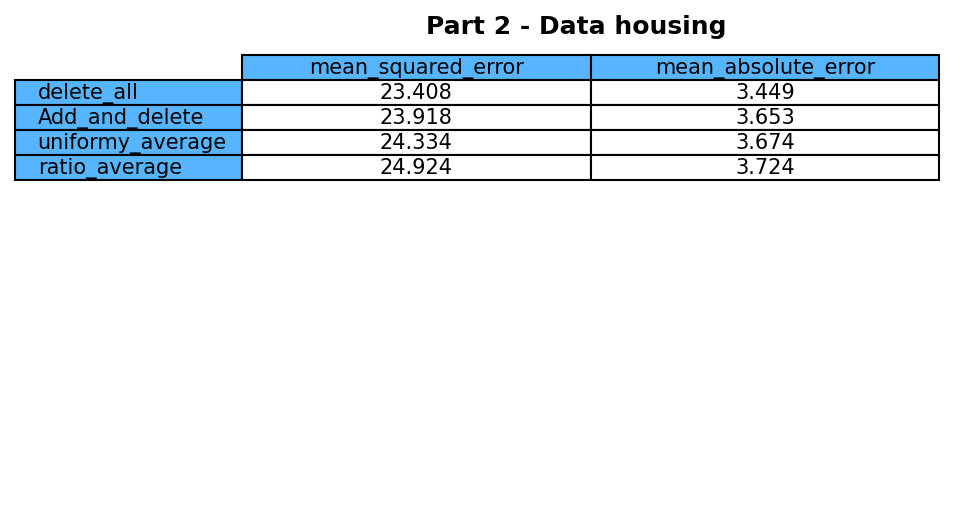

In [95]:
val2 = ["delete_all","Add_and_delete","uniformy_average","ratio_average"]
list_acc = [acc2,acc3,acc4,acc5]

tables.part2(list_acc,"Part 2 - Data housing",val2)

### Part 3


In [96]:

best_result = acc[0].copy()
dd = dect_function.combination(df,algos,best_result)

for a in acc:
    print(a)
acc.append(best_result)
print(dd)

{'mean_squared_error': 24.144548895007606, 'mean_absolute_error': 3.656168318002462}
{'mean_squared_error': 23.382530603640703, 'mean_absolute_error': 3.589724440612474}
{'mean_squared_error': 24.086887925507305, 'mean_absolute_error': 3.662938963036632}
{'mean_squared_error': 24.208864968679066, 'mean_absolute_error': 3.664276154456198}
{'mean_squared_error': 22.912121330282254, 'mean_absolute_error': 3.4937493138166733}
{'mean_squared_error': array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,

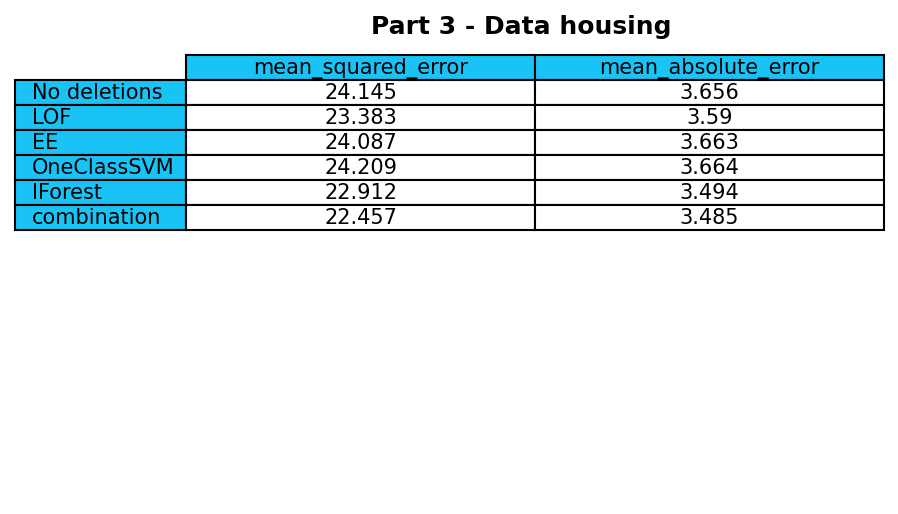

In [97]:
tables.algo_combination(acc,"Part 3 - Data housing")